In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
# check details of the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# check the no.of missing values in each column 
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# statistical information about the dataset 
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# data distribution

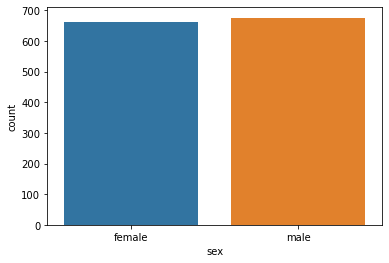

In [15]:
sns.countplot(x='sex', data=df) 
plt.show()

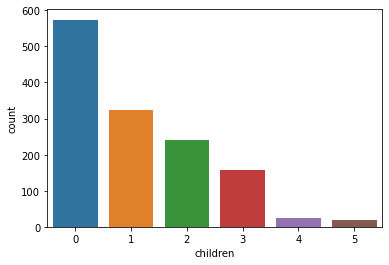

In [9]:
sns.countplot(x='children', data=df) 
plt.show()

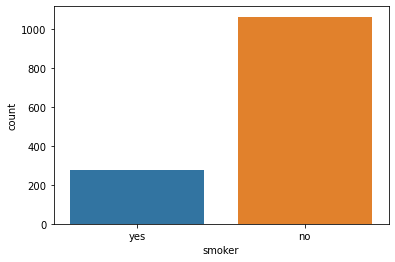

In [10]:
sns.countplot(x='smoker', data=df) 
plt.show()

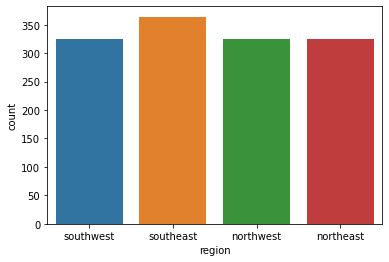

In [11]:
sns.countplot(x='region', data=df) 
plt.show()

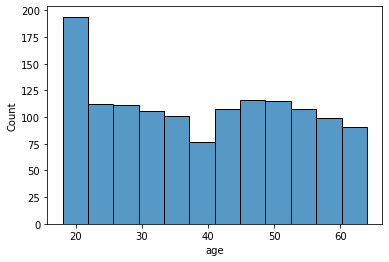

In [12]:
sns.histplot(df['age'], kde=False)
plt.show()

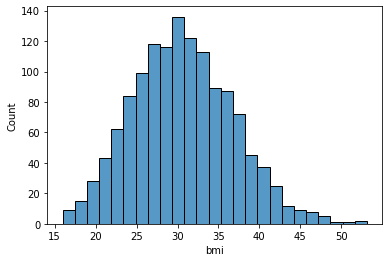

In [13]:
sns.histplot(df['bmi'], kde=False)
plt.show()

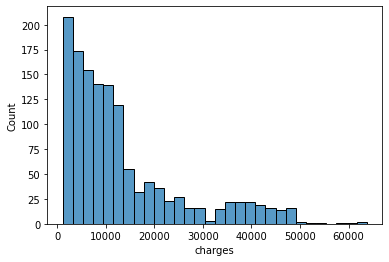

In [14]:
sns.histplot(df['charges'], kde=False)
plt.show()

In [29]:
numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_columns]

# Print the resulting DataFrame
print(df_numeric)

      age  sex     bmi  children      charges
0      19  NaN  27.900         0  16884.92400
1      18  NaN  33.770         1   1725.55230
2      28  NaN  33.000         3   4449.46200
3      33  NaN  22.705         0  21984.47061
4      32  NaN  28.880         0   3866.85520
...   ...  ...     ...       ...          ...
1333   50  NaN  30.970         3  10600.54830
1334   18  NaN  31.920         0   2205.98080
1335   18  NaN  36.850         0   1629.83350
1336   21  NaN  25.800         0   2007.94500
1337   61  NaN  29.070         0  29141.36030

[1338 rows x 5 columns]


In [31]:
# Drop a single column(sex)
df = df_numeric.drop('sex', axis=1)

# Print the resulting DataFrame
print(df)

      age     bmi  children      charges
0      19  27.900         0  16884.92400
1      18  33.770         1   1725.55230
2      28  33.000         3   4449.46200
3      33  22.705         0  21984.47061
4      32  28.880         0   3866.85520
...   ...     ...       ...          ...
1333   50  30.970         3  10600.54830
1334   18  31.920         0   2205.98080
1335   18  36.850         0   1629.83350
1336   21  25.800         0   2007.94500
1337   61  29.070         0  29141.36030

[1338 rows x 4 columns]


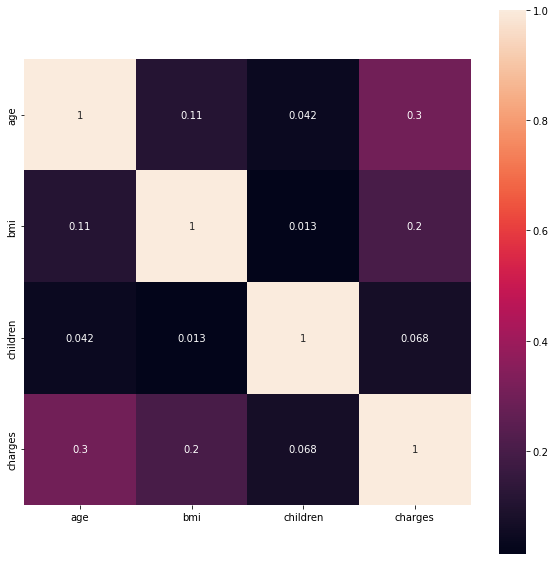

In [32]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(method='pearson'), annot=True, square=True)
plt.show()

In [33]:
from scipy.stats import pearsonr

# # Convert non-numeric columns to numeric
# df['sex'] = pd.to_numeric(df['sex'], errors='coerce')

print('Correlation of different features of our dataset with charges:')
for i in df.columns:
  corr, _ = pearsonr(df[i], df['charges'])
  print('%s : %.4f' %(i,corr))

Correlation of different features of our dataset with charges:
age : 0.2990
bmi : 0.1983
children : 0.0680
charges : 1.0000


In [34]:
#for another view, this method can be used to view correlations
print('Another view of correlations among features:\n')
df.corr().style.background_gradient(cmap="coolwarm")

Another view of correlations among features:



,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64


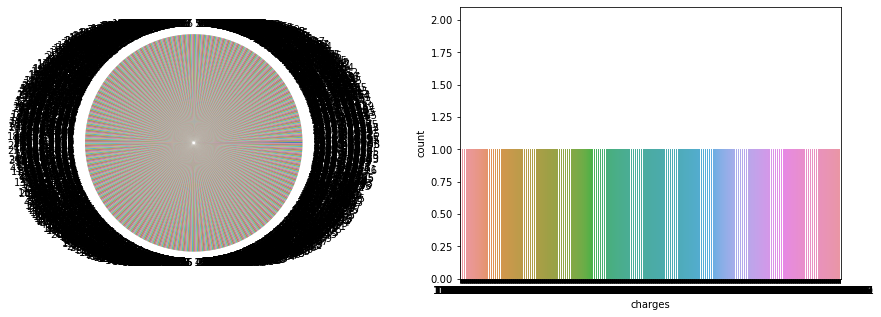

In [35]:
print(df['charges'].value_counts())
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(18, 5))
ax = ax.flatten()
df['charges'].value_counts().plot(x=0, y=1, kind='pie', figsize=(15,5), ax=ax[0])
sns.countplot(df['charges'], ax=ax[1])
plt.show()